In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import numpy as np
import pandas as pd

fiveByFive = np.array([
    [131,673,234,103,18],
    [201,96,342,965,150],
    [630,803,746,422,111],
    [537,699,497,121,956],
    [805,732,524,37,331]
])

eightyByEighty = pd.DataFrame(pd.read_csv('p081_matrix.txt',header=None)).values

distances = {}
nodes = []

matrix = eightyByEighty

for i, row in enumerate(matrix):
    for j, col in enumerate(row):
        nodes.append((i,j))
        if i < len(matrix)-1 and j < len(row)-1:
            distances.update(
                {(i,j):{
                    (i+1,j): {'weight':matrix[i+1,j]},
                    (i,j+1): {'weight':matrix[i,j+1]}
                }})
        elif i == len(matrix)-1 and j < len(row)-1:
            distances.update(
                {(i,j):{
                    (i,j+1): {'weight':matrix[i,j+1]}
                }})
            
        elif j == len(row)-1 and i < len(row)-1:
            distances.update(
                {(i,j):{
                    (i+1,j): {'weight':matrix[i+1,j]}
                }})

nodes = nodes[:-1]


G = nx.DiGraph(distances)

path = nx.dijkstra_path(G, (0,0), (len(matrix)-1,len(matrix)-1))

path_total = matrix[(0,0)]
for i in range(len(path)-1):
    path_total += G[path[i]][path[i+1]]['weight']

print path_total

427337


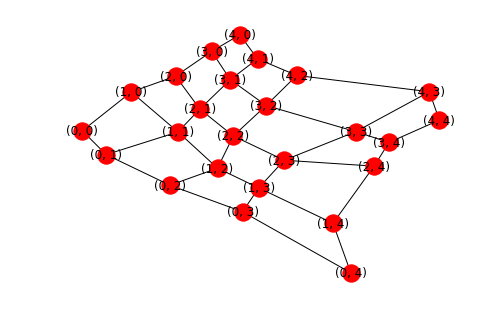

In [72]:
G = nx.Graph(distances, weights=False)

nx.draw(G, with_labels=True)